<a href="https://colab.research.google.com/github/sidaksodhi2/HandwrittenEquationSolver/blob/main/HandwrittenEquationSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving archive (6).zip to archive (6).zip


In [2]:
import zipfile
import os

zip_file_name="archive (6).zip"

with zipfile.ZipFile(zip_file_name,'r') as zip_ref:
  zip_ref.extractall("data")

print("Extracted folders:",os.listdir("data"))

Extracted folders: ['dataset']


In [3]:
for root,dirs,files in os.walk("data"):
  print(root)
  break

data


In [4]:
dataset_path="data/archive (6)"

In [5]:
for root, dirs, files in os.walk("data"):
    print("Files in", root, ":", files)

Files in data : []
Files in data/dataset : ['.directory']
Files in data/dataset/2 : ['uzKz10HL.png', '37682.jpg', 'W4kMSAYE.png', '34992.jpg', '74679.jpg', '46593.jpg', '5bZExW3s.png', '27373.jpg', '81511.jpg', 'XdulXM5v.png', '7708.jpg', 'rzmu7lEP.png', '12874.jpg', '72133.jpg', '18811.jpg', '14799.jpg', '54359.jpg', '18195.jpg', 'nlaEKzFZ.png', '19051.jpg', '44692.jpg', '48025.jpg', '77953.jpg', 'i8urHjhe.png', 'GGUuodBC.png', '61547.jpg', '60086.jpg', 'j38W2jrV.png', '95629.jpg', '11558.jpg', '676.jpg', 'la8pZj23.png', '65532.jpg', '44304.jpg', '35745.jpg', 'VnnDGz83.png', '50740.jpg', '85756.jpg', '14383.jpg', '21347.jpg', '79078.jpg', '59594.jpg', '41287.jpg', '86927.jpg', '0Yyn3PUt.png', '57769.jpg', '34171.jpg', 'kbaRJmQr.png', '52502.jpg', 'An874LHw.png', '64230.jpg', '64535.jpg', '89875.jpg', '9171.jpg', '40616.jpg', '96213.jpg', 'xVm4C2ia.png', '14004.jpg', '34573.jpg', '22891.jpg', 's7ILBVSq.png', '48561.jpg', 'ryCUZasQ.png', '1277.jpg', 'vcgOq5is.png', 'Pabl0a9d.png', '7382

In [6]:
def center_symbols(img,target_size=64):
  coords=cv2.findNonZero(img)
  if coords is None:
     print("Warning: Image with no content found - skipping")
     return None

  x,y,w,h=cv2.boundingRect(coords)

  symbol=img[y:y+h,x:x+w]
  #padding
  max_dim=max(w,h)
  padded_size=int(max_dim*1.2)
  padded=np.zeros((padded_size,padded_size),dtype=np.uint8)

  start_x = (padded_size - w) // 2
  start_y = (padded_size - h) // 2
  padded[start_y:start_y+h, start_x:start_x+w] = symbol

  resized = cv2.resize(padded, (target_size, target_size))

  return resized


In [7]:
def preprocess_image(img_path, target_size=64):
   try:
     img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
     if img is None:
      print(f"Could not load image: {img_path}")
      return None

     if img.sum() == 0:
       print(f"All black image detected: {img_path}")
       return None

     img=cv2.GaussianBlur(img,(3,3),0)
     img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
     kernel = np.ones((2,2), np.uint8)
     img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
     img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

     img = center_symbols(img, img_size)
     if img is None:
       return None

     # Check if final image is all black
     if img.sum() == 0:
      print(f"Image became all black after processing: {img_path}")
      return None
     img = img.astype(np.float32) / 255.0

     return img

   except Exception as e:
     print(f"Error processing {img_path}: {str(e)}")
     return None



In [8]:
import os

dataset_path = "data/dataset"

# Filter only valid directories (classes)
classes = sorted([cls for cls in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cls))])
label_map = {cls: idx for idx, cls in enumerate(classes)}
print("Label Map:", label_map)

# Now load image paths and labels
data = []
labels = []
valid_extensions = ('.png', '.jpg', '.jpeg')
for cls in classes:
    class_folder = os.path.join(dataset_path, cls)
    if not os.path.isdir(class_folder):
        continue
    class_count=0
    for img_file in os.listdir(class_folder):
        if not img_file.lower().endswith(valid_extensions):
            continue

        img_path = os.path.join(class_folder, img_file)

        data.append(img_path)
        labels.append(label_map[cls])
        class_count+=1
    print(f"Class {cls} has {class_count} images")
print(f"\nTotal images found: {len(data)}")

Label Map: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'add': 10, 'dec': 11, 'div': 12, 'eq': 13, 'mul': 14, 'sub': 15, 'x': 16, 'y': 17, 'z': 18}
Class 0 has 595 images
Class 1 has 562 images
Class 2 has 433 images
Class 3 has 541 images
Class 4 has 526 images
Class 5 has 433 images
Class 6 has 581 images
Class 7 has 533 images
Class 8 has 554 images
Class 9 has 546 images
Class add has 596 images
Class dec has 624 images
Class div has 618 images
Class eq has 634 images
Class mul has 577 images
Class sub has 655 images
Class x has 452 images
Class y has 399 images
Class z has 212 images

Total images found: 10071


In [9]:
import numpy as np
import cv2
img_size=64
x=[]
y=[]
failed_count=0
failed_images=[]
print("Preprocessing images...")
for i, (img_path, label) in enumerate(zip(data, labels)):
   if i % 100 == 0:
     print(f"Processing {i}/{len(data)} images...")
   img = preprocess_image(img_path, img_size)
   if img is not None:
     x.append(img)
     y.append(label)
   else:
    failed_count+=1
    failed_images.append(img_path)
print(f"\nPreprocessing complete!")
print(f"Successful: {len(x)} images")
print(f"Failed: {failed_count} images")
if failed_images:
    print(f"\nFirst few failed images:")
    for img in failed_images[:5]:
        print(f"  - {img}")
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)

print(f"\nFinal dataset shape:")
print(f"X (images): {x.shape}")
print(f"y (labels): {y.shape}")
print(f"Data type: {x.dtype}")
print(f"Value range: {x.min():.3f} to {x.max():.3f}")



Preprocessing images...
Processing 0/10071 images...
Processing 100/10071 images...
Processing 200/10071 images...
Processing 300/10071 images...
Processing 400/10071 images...
Processing 500/10071 images...
Processing 600/10071 images...
Processing 700/10071 images...
Processing 800/10071 images...
Processing 900/10071 images...
Processing 1000/10071 images...
Processing 1100/10071 images...
Processing 1200/10071 images...
Processing 1300/10071 images...
Processing 1400/10071 images...
Processing 1500/10071 images...
Processing 1600/10071 images...
Processing 1700/10071 images...
Processing 1800/10071 images...
Processing 1900/10071 images...
Processing 2000/10071 images...
Processing 2100/10071 images...
Processing 2200/10071 images...
Processing 2300/10071 images...
Processing 2400/10071 images...
Processing 2500/10071 images...
Processing 2600/10071 images...
Processing 2700/10071 images...
Processing 2800/10071 images...
Processing 2900/10071 images...
Processing 3000/10071 images

In [10]:
def analyze_data_quality(x, y, classes):
    """Comprehensive data quality analysis"""
    print("=" * 50)
    print("DATA QUALITY ANALYSIS")
    print("=" * 50)

    print(f"Data shape: {x.shape}")
    print(f"Labels shape: {y.shape}")
    print(f"Data type: {x.dtype}")
    print(f"Value range: {x.min():.3f} to {x.max():.3f}")
    print(f"Mean: {x.mean():.3f}, Std: {x.std():.3f}")

    # Check for problematic images
    black_images = []
    for i, img in enumerate(x):
        if img.sum() == 0:
            black_images.append(i)

    if black_images:
        print(f"\nWARNING: {len(black_images)} all-black images found!")
        print("Consider removing these indices:", black_images[:10])
    else:
        print("\n✓ No all-black images found")

    # Class distribution
    unique, counts = np.unique(y, return_counts=True)
    print(f"\nClass distribution:")
    for class_idx, count in zip(unique, counts):
        print(f"  {classes[class_idx]:>10}: {count:>4} images")

    return black_images
black_images = analyze_data_quality(x, y, classes)

DATA QUALITY ANALYSIS
Data shape: (10070, 64, 64, 1)
Labels shape: (10070,)
Data type: float32
Value range: 0.000 to 1.000
Mean: 0.115, Std: 0.308

✓ No all-black images found

Class distribution:
           0:  595 images
           1:  562 images
           2:  433 images
           3:  541 images
           4:  526 images
           5:  433 images
           6:  581 images
           7:  533 images
           8:  554 images
           9:  546 images
         add:  596 images
         dec:  624 images
         div:  618 images
          eq:  634 images
         mul:  577 images
         sub:  655 images
           x:  451 images
           y:  399 images
           z:  212 images


In [11]:
if black_images:
    print(f"Removing {len(black_images)} problematic images...")
    valid_indices = [i for i in range(len(x)) if i not in black_images]
    x = x[valid_indices]
    y = y[valid_indices]
    print(f"Dataset size after cleaning: {x.shape}")

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print("Training data shape:",x_train.shape)
print("Testing data shape:",x_test.shape)

Training data shape: (8056, 64, 64, 1)
Testing data shape: (2014, 64, 64, 1)


In [13]:
import matplotlib.pyplot as plt
def visualize_samples(x_data, y_data, classes, num_samples=15):
    """Visualize sample images from dataset"""
    cols = 5
    rows = (num_samples + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))
    axes = axes.flatten() if rows > 1 else [axes] if cols == 1 else axes

    shown_classes = set()
    sample_count = 0

    for i, (img, label) in enumerate(zip(x_data, y_data)):
        if label not in shown_classes and sample_count < num_samples:
            img_display = img.reshape(64, 64)
            axes[sample_count].imshow(img_display, cmap='gray')
            axes[sample_count].set_title(f'{classes[label]} ({label})')
            axes[sample_count].axis('off')

            shown_classes.add(label)
            sample_count += 1

        if sample_count >= num_samples:
            break

    # Hide unused subplots
    for i in range(sample_count, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [14]:
def plot_class_distribution(y_data, classes):
    """Plot class distribution"""
    unique, counts = np.unique(y_data, return_counts=True)

    plt.figure(figsize=(12, 6))
    class_names = [classes[i] for i in unique]
    bars = plt.bar(class_names, counts)

    # Add value labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                str(count), ha='center', va='bottom')

    plt.title('Class Distribution in Dataset')
    plt.xlabel('Symbol Classes')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Visualizing sample images from each class...


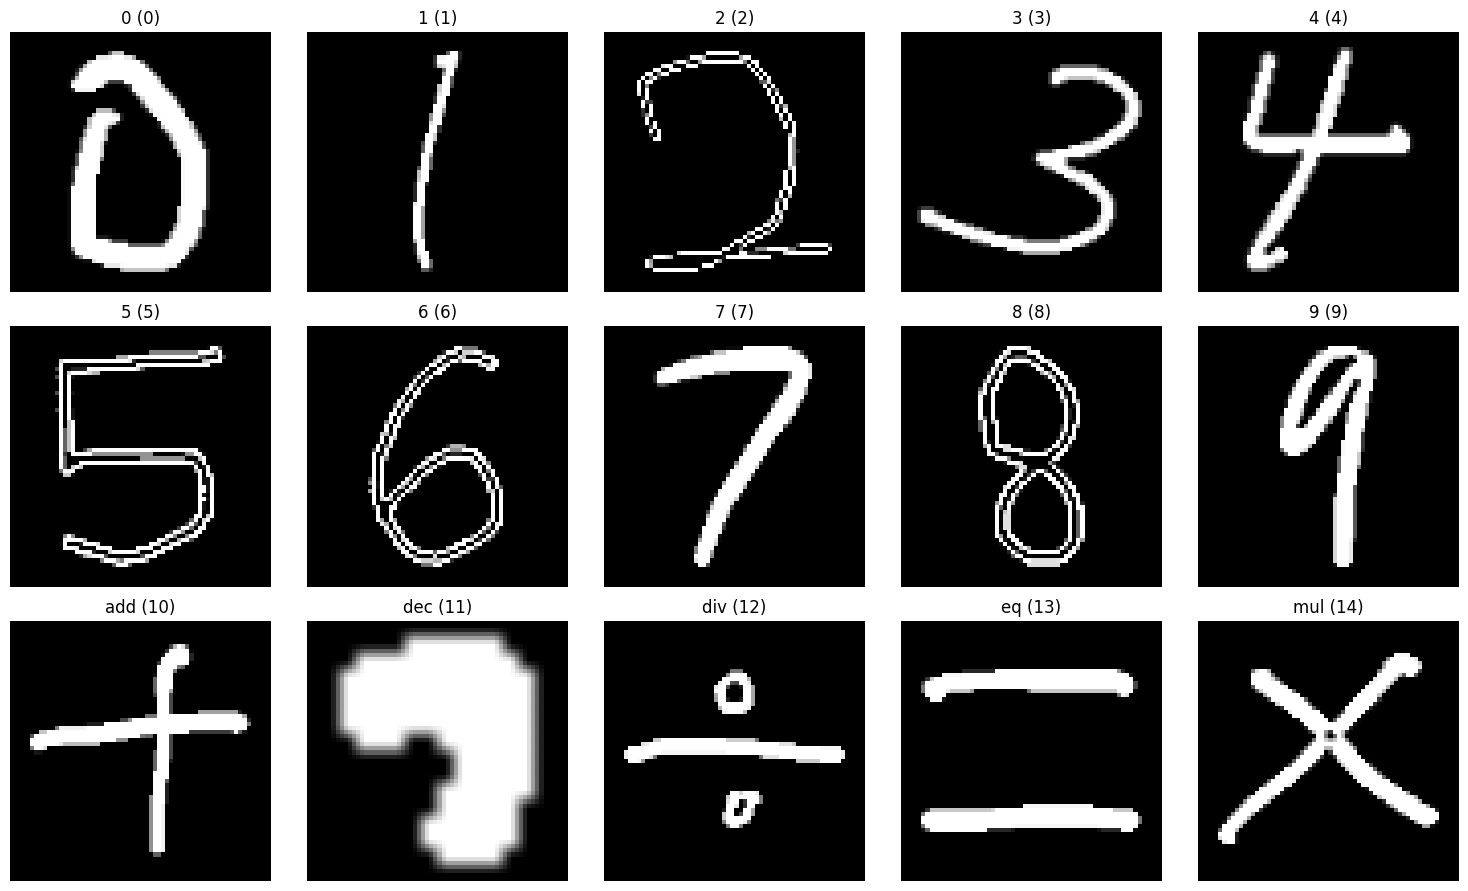

Class distribution visualization...


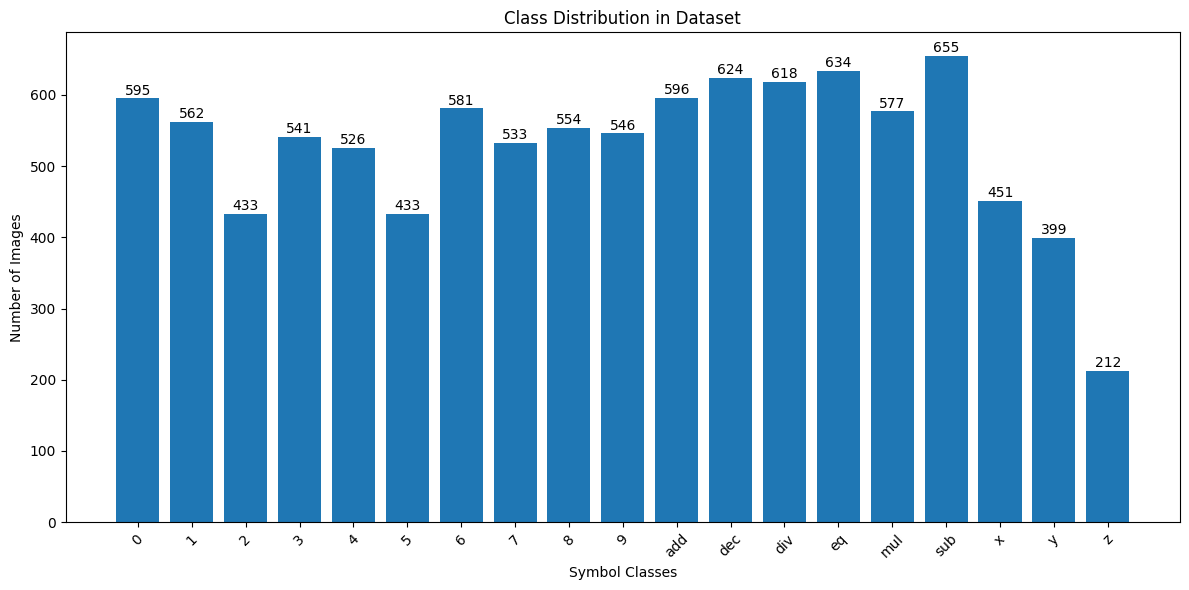

In [15]:
print("Visualizing sample images from each class...")
visualize_samples(x, y, classes, num_samples=min(15, len(classes)))

print("Class distribution visualization...")
plot_class_distribution(y, classes)

In [16]:
def check_preprocessing_quality(x_data, y_data, classes):
    """Check various aspects of preprocessed data"""
    print("Preprocessing Quality Check:")
    print("-" * 40)

    # Check data types and ranges
    print(f"Data type: {x_data.dtype}")
    print(f"Value range: {x_data.min():.3f} to {x_data.max():.3f}")
    print(f"Mean value: {x_data.mean():.3f}")
    print(f"Standard deviation: {x_data.std():.3f}")

    # Check for any failed preprocessing (all zeros)
    failed_images = []
    for i, img in enumerate(x_data):
        if img.sum() == 0:  # All black image
            failed_images.append(i)

    if failed_images:
        print(f"\nWarning: {len(failed_images)} images appear to be all black!")
        print("This might indicate preprocessing issues.")
    else:
        print("\n All images processed successfully!")

    # Show some statistics
    print(f"\nImage statistics:")
    print(f"- Shape: {x_data.shape}")
    print(f"- Memory usage: {x_data.nbytes / (1024*1024):.2f} MB")

# Check your preprocessed data
check_preprocessing_quality(x, y, classes)

Preprocessing Quality Check:
----------------------------------------
Data type: float32
Value range: 0.000 to 1.000
Mean value: 0.115
Standard deviation: 0.308

 All images processed successfully!

Image statistics:
- Shape: (10070, 64, 64, 1)
- Memory usage: 157.34 MB


In [17]:
save_data = input("Do you want to save the preprocessed data? (y/n): ").lower() == 'y'

if save_data:
    np.save('x_train.npy', x_train)
    np.save('x_test.npy', x_test)
    np.save('y_train.npy', y_train)
    np.save('y_test.npy', y_test)

    # Save classes list
    import pickle
    with open('classes.pkl', 'wb') as f:
        pickle.dump(classes, f)

    print("Data saved successfully!")
    print("Files saved:")
    print("- x_train.npy")
    print("- x_test.npy")
    print("- y_train.npy")
    print("- y_test.npy")
    print("- classes.pkl")

Do you want to save the preprocessed data? (y/n): y
Data saved successfully!
Files saved:
- x_train.npy
- x_test.npy
- y_train.npy
- y_test.npy
- classes.pkl


CNN MODEL

In [18]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import cv2
import os
from PIL import Image
import pickle


In [19]:

try:
    x_train = np.load('x_train.npy')
    x_test = np.load('x_test.npy')
    y_train = np.load('y_train.npy')
    y_test = np.load('y_test.npy')

    import pickle
    with open('classes.pkl', 'rb') as f:
        classes = pickle.load(f)

    print("Loaded preprocessed data from files:")
    print(f"Training set: {x_train.shape}")
    print(f"Test set: {x_test.shape}")
    print(f"Classes: {len(classes)}")

except FileNotFoundError:
    print("Preprocessed data files not found.")
    print("Please run the preprocessing notebook first!")
    print("Or make sure x_train, x_test, y_train, y_test, and classes are defined.")



Loaded preprocessed data from files:
Training set: (8056, 64, 64, 1)
Test set: (2014, 64, 64, 1)
Classes: 19


In [20]:
num_classes=len(classes)
input_shape=(64,64,1)
print(f"Dataset info:")
print(f"- Input shape: {input_shape}")
print(f"- Number of classes: {num_classes}")
print(f"- Training samples: {len(x_train)}")
print(f"- Test samples: {len(x_test)}")

y_train_cat=tf.keras.utils.to_categorical(y_train,num_classes)
y_test_cat=tf.keras.utils.to_categorical(y_test,num_classes)

print(f"- Label shape after categorical conversion: {y_train_cat.shape}")


Dataset info:
- Input shape: (64, 64, 1)
- Number of classes: 19
- Training samples: 8056
- Test samples: 2014
- Label shape after categorical conversion: (8056, 19)


In [21]:
def create_cnn_model(input_shape,num_classes):
  model=models.Sequential([
      #First Convolutional Block
      layers.Conv2D(32,(3,3),activation='relu',
                    input_shape=input_shape,padding='same'),
      layers.BatchNormalization(),
      layers.Conv2D(32,(3,3),activation='relu',padding='same'),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.25),

      #Second Convolutional Block
      layers.Conv2D(64,(3,3),activation='relu',padding='same'),
      layers.BatchNormalization(),
      layers.Conv2D(64,(3,3),activation='relu',padding='same'),
      layers.MaxPool2D((2,2)),
      layers.Dropout(0.25),

      #Third Convolutional Block
      layers.Conv2D(128,(3,3),activation='relu',padding='same'),
      layers.BatchNormalization(),
      layers.Conv2D(128,(3,3),activation='relu',padding='same'),
      layers.MaxPool2D((2,2)),
      layers.Dropout(0.25),

      #Dense Layers
      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(num_classes, activation='softmax')
  ])
  return model

model=create_cnn_model(input_shape,num_classes)
print("Model Architecture:")
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 19)             │         4,883 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,620,403 (17.63 MB)

 Trainable params: 4,618,931 (17.62 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [22]:
tf.keras.utils.plot_model(model, to_file='model_architecture.png',
                          show_shapes=True, show_layer_names=True)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")
print("Optimizer: Adam")
print("Loss function: Categorical Crossentropy")
print("Metrics: Accuracy")

Model compiled successfully!
Optimizer: Adam
Loss function: Categorical Crossentropy
Metrics: Accuracy


In [23]:
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=8,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]
print("Callbacks configured:")
print("- Early Stopping (patience=15)")
print("- Learning Rate Reduction (factor=0.5, patience=8)")
print("- Model Checkpoint (save best model)")


Callbacks configured:
- Early Stopping (patience=15)
- Learning Rate Reduction (factor=0.5, patience=8)
- Model Checkpoint (save best model)


In [24]:
#Training
history=model.fit(
    x_train,y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data=(x_test,y_test_cat),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 883ms/step - accuracy: 0.5635 - loss: 1.5373
Epoch 1: val_accuracy improved from -inf to 0.06207, saving model to best_model.h5


252/252 ━━━━━━━━━━━━━━━━━━━━ 242s 938ms/step - accuracy: 0.5642 - loss: 1.5349 - val_accuracy: 0.0621 - val_loss: 9.1706 - learning_rate: 0.0010
Epoch 2/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.8915 - loss: 0.3564
Epoch 2: val_accuracy improved from 0.06207 to 0.44141, saving model to best_model.h5


252/252 ━━━━━━━━━━━━━━━━━━━━ 265s 951ms/step - accuracy: 0.8916 - loss: 0.3563 - val_accuracy: 0.4414 - val_loss: 2.0950 - learning_rate: 0.0010
Epoch 3/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.9291 - loss: 0.2247
Epoch 3: val_accuracy improved from 0.44141 to 0.96326, saving model to best_model.h5


252/252 ━━━━━━━━━━━━━━━━━━━━ 263s 955ms/step - accuracy: 0.9291 - loss: 0.2246 - val_accuracy: 0.9633 - val_loss: 0.0987 - learning_rate: 0.0010
Epoch 4/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 853ms/step - accuracy: 0.9462 - loss: 0.1746
Epoch 4: val_accuracy improved from 0.96326 to 0.97865, saving model to best_model.h5


252/252 ━━━━━━━━━━━━━━━━━━━━ 257s 935ms/step - accuracy: 0.9462 - loss: 0.1746 - val_accuracy: 0.9786 - val_loss: 0.0722 - learning_rate: 0.0010
Epoch 5/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.9597 - loss: 0.1302
Epoch 5: val_accuracy did not improve from 0.97865
252/252 ━━━━━━━━━━━━━━━━━━━━ 256s 914ms/step - accuracy: 0.9597 - loss: 0.1302 - val_accuracy: 0.9533 - val_loss: 0.1510 - learning_rate: 0.0010
Epoch 6/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - accuracy: 0.9630 - loss: 0.1178
Epoch 6: val_accuracy improved from 0.97865 to 0.98213, saving model to best_model.h5


252/252 ━━━━━━━━━━━━━━━━━━━━ 239s 950ms/step - accuracy: 0.9630 - loss: 0.1178 - val_accuracy: 0.9821 - val_loss: 0.0627 - learning_rate: 0.0010
Epoch 7/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - accuracy: 0.9681 - loss: 0.1012
Epoch 7: val_accuracy improved from 0.98213 to 0.98411, saving model to best_model.h5


252/252 ━━━━━━━━━━━━━━━━━━━━ 239s 950ms/step - accuracy: 0.9681 - loss: 0.1012 - val_accuracy: 0.9841 - val_loss: 0.0516 - learning_rate: 0.0010
Epoch 8/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.9687 - loss: 0.0964
Epoch 8: val_accuracy improved from 0.98411 to 0.98560, saving model to best_model.h5


252/252 ━━━━━━━━━━━━━━━━━━━━ 254s 917ms/step - accuracy: 0.9687 - loss: 0.0964 - val_accuracy: 0.9856 - val_loss: 0.0492 - learning_rate: 0.0010
Epoch 9/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.9752 - loss: 0.0777
Epoch 9: val_accuracy did not improve from 0.98560
252/252 ━━━━━━━━━━━━━━━━━━━━ 269s 947ms/step - accuracy: 0.9752 - loss: 0.0777 - val_accuracy: 0.9846 - val_loss: 0.0645 - learning_rate: 0.0010
Epoch 10/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 878ms/step - accuracy: 0.9714 - loss: 0.0881
Epoch 10: val_accuracy did not improve from 0.98560
252/252 ━━━━━━━━━━━━━━━━━━━━ 265s 960ms/step - accuracy: 0.9714 - loss: 0.0880 - val_accuracy: 0.9796 - val_loss: 0.0705 - learning_rate: 0.0010
Epoch 11/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.9769 - loss: 0.0700
Epoch 11: val_accuracy improved from 0.98560 to 0.98709, saving model to best_model.h5


252/252 ━━━━━━━━━━━━━━━━━━━━ 260s 952ms/step - accuracy: 0.9769 - loss: 0.0700 - val_accuracy: 0.9871 - val_loss: 0.0564 - learning_rate: 0.0010
Epoch 12/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 879ms/step - accuracy: 0.9818 - loss: 0.0607
Epoch 12: val_accuracy did not improve from 0.98709
252/252 ━━━━━━━━━━━━━━━━━━━━ 264s 961ms/step - accuracy: 0.9818 - loss: 0.0608 - val_accuracy: 0.9871 - val_loss: 0.0429 - learning_rate: 0.0010
Epoch 13/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.9835 - loss: 0.0559
Epoch 13: val_accuracy did not improve from 0.98709
252/252 ━━━━━━━━━━━━━━━━━━━━ 264s 968ms/step - accuracy: 0.9835 - loss: 0.0560 - val_accuracy: 0.9871 - val_loss: 0.0482 - learning_rate: 0.0010
Epoch 14/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 883ms/step - accuracy: 0.9873 - loss: 0.0402
Epoch 14: val_accuracy did not improve from 0.98709
252/252 ━━━━━━━━━━━━━━━━━━━━ 254s 934ms/step - accuracy: 0.9873 - loss: 0.0402 - val_accuracy: 0.9856 - val_loss: 0.0526 - learning_rate: 0

252/252 ━━━━━━━━━━━━━━━━━━━━ 254s 914ms/step - accuracy: 0.9894 - loss: 0.0320 - val_accuracy: 0.9896 - val_loss: 0.0443 - learning_rate: 0.0010
Epoch 21/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.9920 - loss: 0.0261
Epoch 21: val_accuracy did not improve from 0.98957
252/252 ━━━━━━━━━━━━━━━━━━━━ 271s 951ms/step - accuracy: 0.9920 - loss: 0.0261 - val_accuracy: 0.9896 - val_loss: 0.0374 - learning_rate: 5.0000e-04
Epoch 22/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.9930 - loss: 0.0216
Epoch 22: val_accuracy improved from 0.98957 to 0.99206, saving model to best_model.h5


252/252 ━━━━━━━━━━━━━━━━━━━━ 244s 968ms/step - accuracy: 0.9930 - loss: 0.0216 - val_accuracy: 0.9921 - val_loss: 0.0279 - learning_rate: 5.0000e-04
Epoch 23/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.9956 - loss: 0.0166
Epoch 23: val_accuracy improved from 0.99206 to 0.99255, saving model to best_model.h5


252/252 ━━━━━━━━━━━━━━━━━━━━ 262s 970ms/step - accuracy: 0.9956 - loss: 0.0166 - val_accuracy: 0.9926 - val_loss: 0.0252 - learning_rate: 5.0000e-04
Epoch 24/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - accuracy: 0.9936 - loss: 0.0235
Epoch 24: val_accuracy did not improve from 0.99255
252/252 ━━━━━━━━━━━━━━━━━━━━ 257s 948ms/step - accuracy: 0.9936 - loss: 0.0234 - val_accuracy: 0.9921 - val_loss: 0.0270 - learning_rate: 5.0000e-04
Epoch 25/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.9933 - loss: 0.0187
Epoch 25: val_accuracy did not improve from 0.99255
252/252 ━━━━━━━━━━━━━━━━━━━━ 230s 914ms/step - accuracy: 0.9933 - loss: 0.0187 - val_accuracy: 0.9896 - val_loss: 0.0439 - learning_rate: 5.0000e-04
Epoch 26/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 866ms/step - accuracy: 0.9961 - loss: 0.0121
Epoch 26: val_accuracy did not improve from 0.99255
252/252 ━━━━━━━━━━━━━━━━━━━━ 270s 948ms/step - accuracy: 0.9961 - loss: 0.0121 - val_accuracy: 0.9911 - val_loss: 0.0292 - lear

252/252 ━━━━━━━━━━━━━━━━━━━━ 253s 919ms/step - accuracy: 0.9969 - loss: 0.0120 - val_accuracy: 0.9945 - val_loss: 0.0231 - learning_rate: 5.0000e-04
Epoch 29/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.9960 - loss: 0.0125
Epoch 29: val_accuracy did not improve from 0.99454
252/252 ━━━━━━━━━━━━━━━━━━━━ 230s 913ms/step - accuracy: 0.9960 - loss: 0.0125 - val_accuracy: 0.9901 - val_loss: 0.0512 - learning_rate: 5.0000e-04
Epoch 30/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - accuracy: 0.9964 - loss: 0.0133
Epoch 30: val_accuracy did not improve from 0.99454
252/252 ━━━━━━━━━━━━━━━━━━━━ 269s 943ms/step - accuracy: 0.9964 - loss: 0.0133 - val_accuracy: 0.9906 - val_loss: 0.0384 - learning_rate: 5.0000e-04
Epoch 31/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.9935 - loss: 0.0151
Epoch 31: val_accuracy did not improve from 0.99454
252/252 ━━━━━━━━━━━━━━━━━━━━ 265s 954ms/step - accuracy: 0.9935 - loss: 0.0151 - val_accuracy: 0.9891 - val_loss: 0.0501 - lear

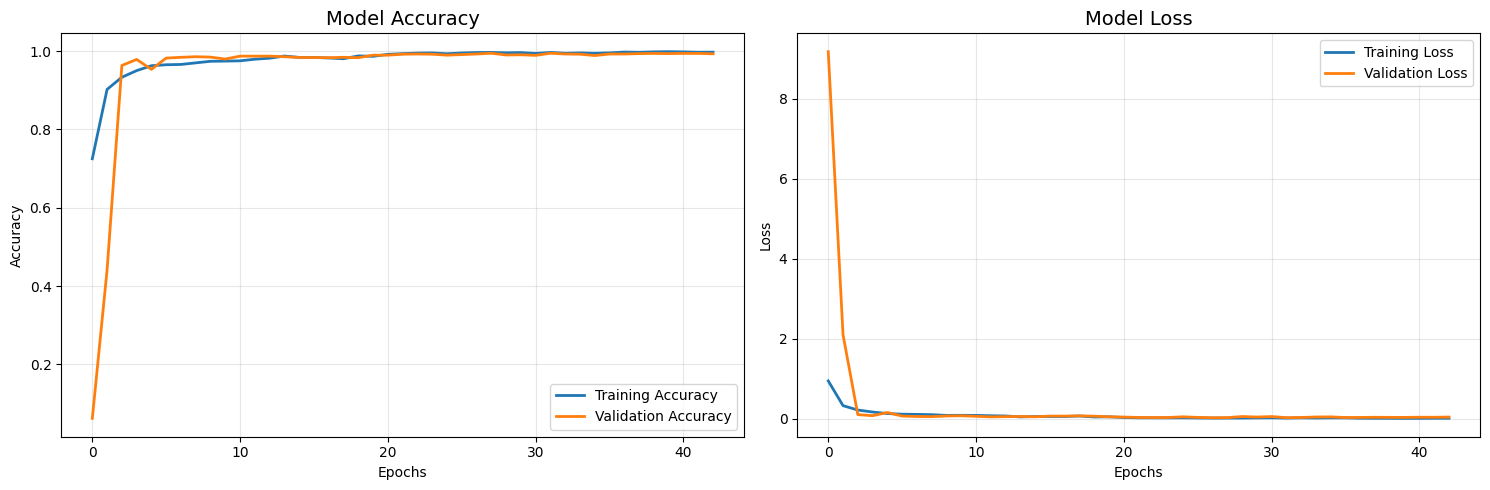

In [26]:
def plot_training_history(history):
    """Plot training history"""
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

    #Plot accuracy
    ax1.plot(history.history['accuracy'],label='Training Accuracy',linewidth=2)
    ax1.plot(history.history['val_accuracy'],label='Validation Accuracy',linewidth=2)
    ax1.set_title('Model Accuracy',fontsize=14)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True,alpha=0.3)

    #Plot loss
    ax2.plot(history.history['loss'],label='Training Loss',linewidth=2)
    ax2.plot(history.history['val_loss'],label='Validation Loss',linewidth=2)
    ax2.set_title('Model Loss',fontsize=14)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True,alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [27]:
test_loss,test_accuracy=model.evaluate(x_test,y_test_cat,verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 99.45%
Test Loss: 0.0231


In [28]:
predictions = model.predict(x_test, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_cat, axis=1)

In [29]:
print("\nDetailed Classification Report:")
print("="*60)
report = classification_report(true_classes, predicted_classes,
                             target_names=classes, digits=4)
print(report)


Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9916    0.9916    0.9916       119
           1     0.9825    1.0000    0.9912       112
           2     1.0000    1.0000    1.0000        87
           3     1.0000    0.9907    0.9953       108
           4     1.0000    0.9905    0.9952       105
           5     1.0000    0.9885    0.9942        87
           6     0.9828    0.9828    0.9828       116
           7     1.0000    0.9907    0.9953       107
           8     1.0000    0.9820    0.9909       111
           9     1.0000    1.0000    1.0000       109
         add     0.9917    1.0000    0.9958       119
         dec     0.9920    0.9920    0.9920       125
         div     1.0000    1.0000    1.0000       124
          eq     1.0000    1.0000    1.0000       127
         mul     1.0000    1.0000    1.0000       115
         sub     0.9924    1.0000    0.9962       131
           x     0.9890    1.0000    0.9945     

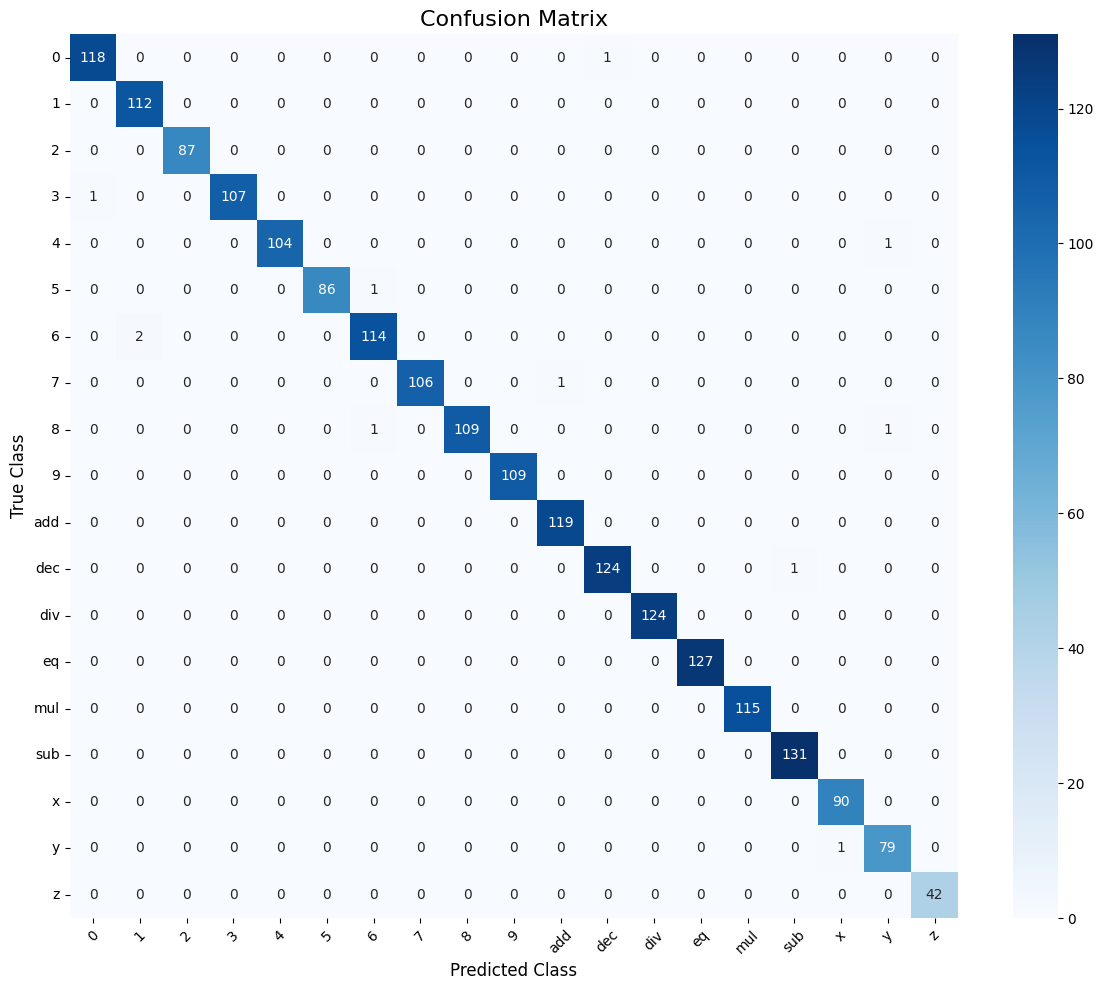

In [30]:
def plot_confusion_matrix(true_classes, predicted_classes, classes):
    """Plot confusion matrix"""
    cm = confusion_matrix(true_classes, predicted_classes)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Class', fontsize=12)
    plt.ylabel('True Class', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(true_classes, predicted_classes, classes)

In [31]:
def analyze_per_class_performance(true_classes, predicted_classes, classes):
    """Analyze performance for each class"""
    from sklearn.metrics import precision_recall_fscore_support

    precision, recall, f1, support = precision_recall_fscore_support(
        true_classes, predicted_classes, average=None
    )

    print("\nPer-Class Performance Analysis:")
    print("="*70)
    print(f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("-"*70)

    for i, class_name in enumerate(classes):
        print(f"{class_name:<15} {precision[i]:<10.4f} {recall[i]:<10.4f} "
              f"{f1[i]:<10.4f} {support[i]:<10}")

    # Find best and worst performing classes
    best_class_idx = np.argmax(f1)
    worst_class_idx = np.argmin(f1)

    print(f"\nBest performing class: {classes[best_class_idx]} (F1: {f1[best_class_idx]:.4f})")
    print(f"Worst performing class: {classes[worst_class_idx]} (F1: {f1[worst_class_idx]:.4f})")

analyze_per_class_performance(true_classes, predicted_classes, classes)


Per-Class Performance Analysis:
Class           Precision  Recall     F1-Score   Support   
----------------------------------------------------------------------
0               0.9916     0.9916     0.9916     119       
1               0.9825     1.0000     0.9912     112       
2               1.0000     1.0000     1.0000     87        
3               1.0000     0.9907     0.9953     108       
4               1.0000     0.9905     0.9952     105       
5               1.0000     0.9885     0.9942     87        
6               0.9828     0.9828     0.9828     116       
7               1.0000     0.9907     0.9953     107       
8               1.0000     0.9820     0.9909     111       
9               1.0000     1.0000     1.0000     109       
add             0.9917     1.0000     0.9958     119       
dec             0.9920     0.9920     0.9920     125       
div             1.0000     1.0000     1.0000     124       
eq              1.0000     1.0000     1.0000     127    

Visualizing predictions on test samples...


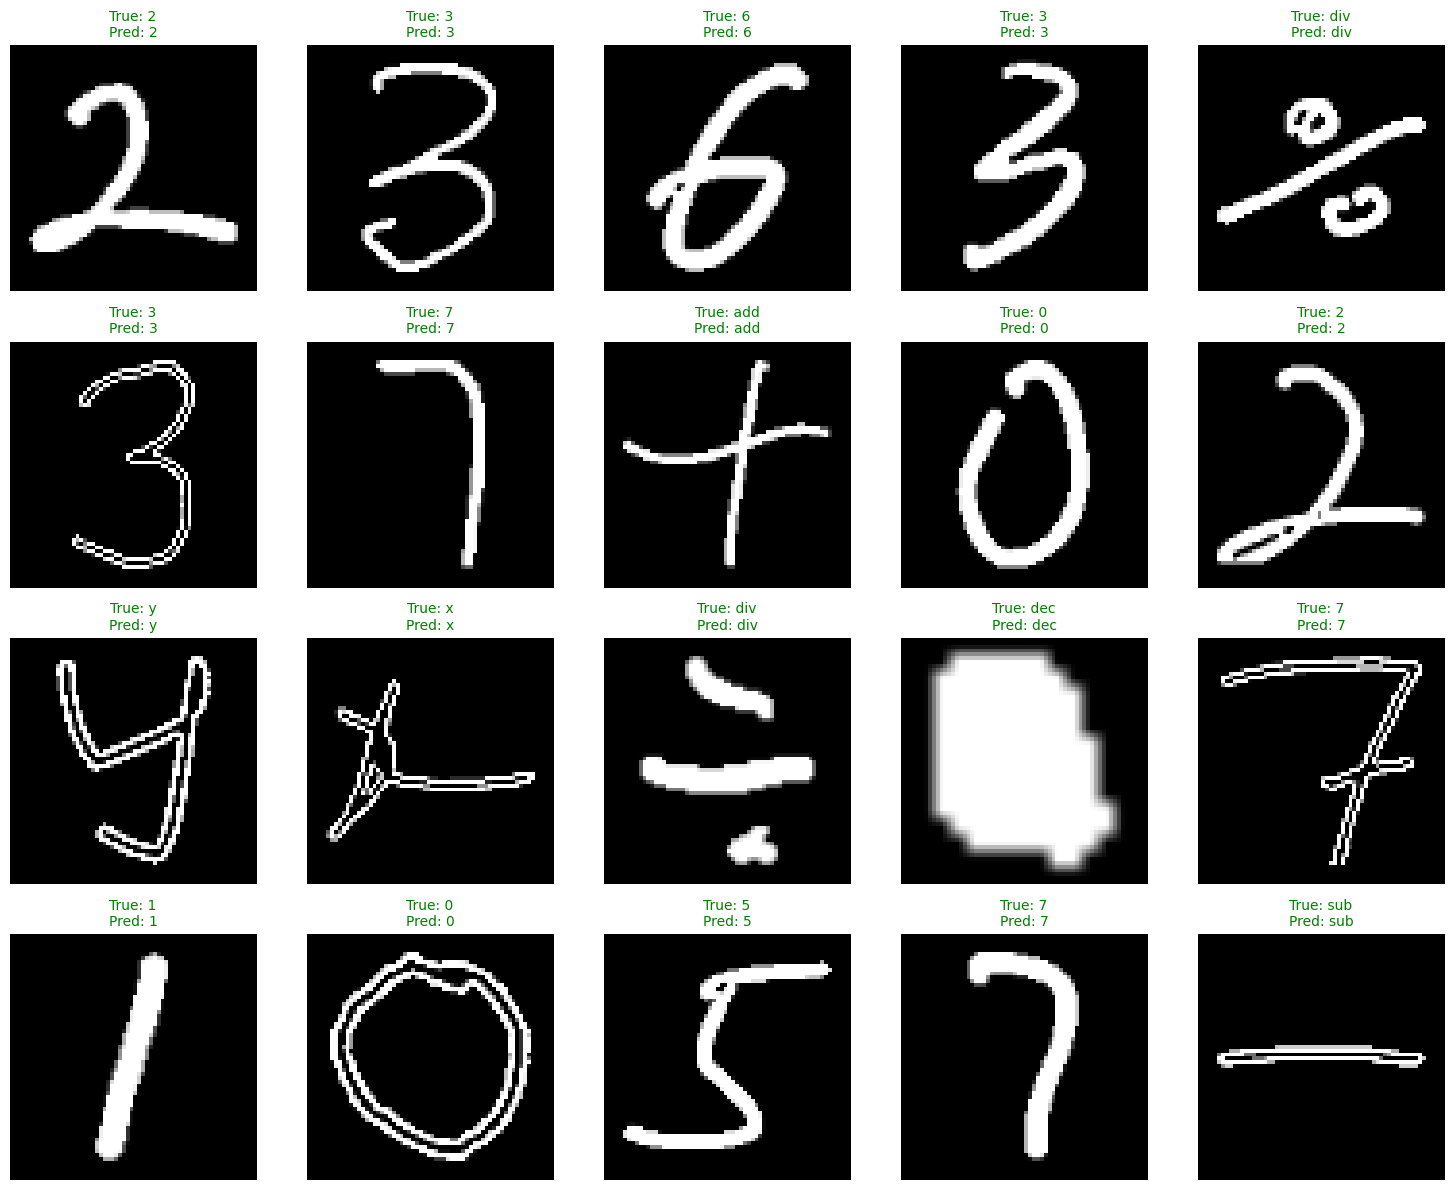

In [32]:
def visualize_predictions(x_test, true_classes, predicted_classes, classes, num_samples=20):
    """Visualize model predictions on test samples"""

    # Select random samples
    indices = np.random.choice(len(x_test), num_samples, replace=False)

    cols = 5
    rows = (num_samples + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))
    axes = axes.flatten() if rows > 1 else [axes] if cols == 1 else axes

    for i, idx in enumerate(indices):
        img = x_test[idx].reshape(64, 64)
        true_label = classes[true_classes[idx]]
        pred_label = classes[predicted_classes[idx]]

        # Color: green for correct, red for incorrect
        color = 'green' if true_classes[idx] == predicted_classes[idx] else 'red'

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}',
                         color=color, fontsize=10)
        axes[i].axis('off')

    # Hide unused subplots
    for i in range(num_samples, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("Visualizing predictions on test samples...")
visualize_predictions(x_test, true_classes, predicted_classes, classes)

In [33]:
model.save('handwritten_equation_solver.h5')
print("\nModel saved as 'handwritten_equation_solver.h5'")


Model saved as 'handwritten_equation_solver.h5'


In [34]:
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)
print("Training history saved as 'training_history.pkl'")

Training history saved as 'training_history.pkl'


In [36]:
print("\n" + "="*60)
print("TRAINING COMPLETE!")
print("="*60)
print(f" Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f" Total Training Epochs: {len(history.history['accuracy'])}")
print(f" Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f" Model saved: handwritten_equation_solver.h5")
print(f" Classes trained: {len(classes)}")
print(f" Input shape: {input_shape}")


TRAINING COMPLETE!
 Final Test Accuracy: 0.9945 (99.45%)
 Total Training Epochs: 43
 Best Validation Accuracy: 0.9945
 Model saved: handwritten_equation_solver.h5
 Classes trained: 19
 Input shape: (64, 64, 1)
